In [1]:
import pandas as pd
from pathlib import Path
from IPython.display import display

In [2]:
def nan_ratios(df, only_show_metrics_with_nans: bool=True):
    nan_ratios = []
    for metric in df.metric.unique():
        metric_df = df.loc[df.metric == metric, "metric_value"]
        nan_ratios.append({"metric": metric, "nan_ratio": metric_df.isna().sum() / len(metric_df)})
    new_df = pd.DataFrame.from_records(nan_ratios).sort_values(by=["nan_ratio"])
    if only_show_metrics_with_nans:
        new_df = new_df[new_df.nan_ratio > 0]
    return new_df

In [3]:
def get_parquet_paths(basedir: str = "../../experiments/results"):
    raw_results = list(
        filter(lambda path: not path.name.endswith("debug.parquet"), Path(basedir).glob("correlation*.parquet"))
    )
    return raw_results

def get_csv_paths(basedir: str = "../../experiments/results"):
    raw_results = list(
        filter(lambda path: not "debug" in str(path), Path(basedir).glob("correlation*.csv"))
    )
    return raw_results

def get_dataframes(paths: list[Path]):
    dfs = []
    for p in paths:
        if p.name.endswith("parquet"):
            dfs.append(pd.read_parquet(p))
        elif p.name.endswith("csv"):
            dfs.append(pd.read_csv(p, index_col=0))
        else:
            raise NotImplementedError()
    return dfs

In [4]:
for df in get_dataframes(get_parquet_paths()):
    print(df.loc[:, "source__representation_dataset"].iloc[0])
    display(nan_ratios(df))

mnli_sc_rate0354


,metric,nan_ratio
20,JSD,0.03
19,PWCCA,0.61


sst2_sc_rate0558


,metric,nan_ratio
0,PWCCA,0.156667
21,JSD,0.350000


sst2_mem_rate0


,metric,nan_ratio
21,JSD,0.35
0,PWCCA,0.60


sst2_aug_rate0


,metric,nan_ratio
21,JSD,0.326667
0,PWCCA,0.696667


In [5]:
dfs = get_dataframes(get_csv_paths())
rank_df = None
corr_df = None
for df in dfs:
    print(df.representation_dataset.iloc[0])

    data = df.copy()
    data.loc[:, "abs_corr"] = data["corr"].abs()
    pivot = data.pivot(
        columns=["functional_similarity_measure", "quality_measure"],
        index="similarity_measure",
        values="abs_corr",
    )

    # display(
    #     df.pivot(
    #         columns=["functional_similarity_measure", "quality_measure"], index="similarity_measure", values="corr"
    #     )
    # )
    display(pivot.sort_values(("Disagreement", "spearmanr"), ascending=False))

    ranked_pivot = pivot.rank(ascending=False)
    # display(ranked_pivot)
    if rank_df is None:
        rank_df = ranked_pivot
    else:
        rank_df += ranked_pivot
    if corr_df is None:
        corr_df = pivot
    else:
        corr_df += pivot

print("Average rank")
rank_df = rank_df / len(dfs)
corr_df = corr_df / len(dfs)
display(rank_df)

sst2_sc_rate0558


functional_similarity_measure                   JSD                       \
quality_measure                            pearsonr spearmanr kendalltau   
similarity_measure                                                         
RSA                                        0.970775  0.879665   0.695268   
AlignedCosineSimilarity                    0.935008  0.825194   0.606661   
DistanceCorrelation                        0.909496  0.840227   0.620724   
CKA                                        0.945642  0.832577   0.606450   
SVCCA                                      0.899517  0.834975   0.611314   
OrthogonalProcrustesCenteredAndNormalized  0.950997  0.821031   0.592070   
OrthogonalAngularShapeMetricCentered       0.949919  0.821031   0.592070   
JaccardSimilarity                          0.832982  0.753741   0.510653   
PermutationProcrustes                      0.892890  0.847437   0.642189   
RankSimilarity                             0.809892  0.728681   0.482527   
HardCorrelationMatch                       0.952826  0.834603   0.616072   
SoftCorrelationMatch                       0.954306  0.831912   0.613746   
ProcrustesSizeAndShapeDistance             0.897140  0.725440   0.472059   
SecondOrderCosineSimilarity                0.781115  0.683298   0.420248   
MagnitudeDifference                        0.874556  0.836016   0.633307   
Gulp                                       0.544439  0.724396   0.482950   
ConcentricityDifference                    0.831864  0.778664   0.565741   
EigenspaceOverlapScore                     0.666729  0.637131   0.459265   
PWCCA                                      0.218424  0.250256   0.172166   
UniformityDifference                       0.231596  0.167499   0.118160   
RSMNormDifference                               NaN       NaN        NaN   

functional_similarity_measure             Disagreement                       
quality_measure                               pearsonr spearmanr kendalltau  
similarity_measure                                                           
RSA                                           0.965258  0.846505   0.660699  
AlignedCosineSimilarity                       0.949768  0.814874   0.609414  
DistanceCorrelation                           0.906908  0.814843   0.613224  
CKA                                           0.925544  0.802024   0.597220  
SVCCA                                         0.880741  0.798744   0.597982  
OrthogonalProcrustesCenteredAndNormalized     0.939569  0.795506   0.585430  
OrthogonalAngularShapeMetricCentered          0.939704  0.795506   0.585430  
JaccardSimilarity                             0.792557  0.794699   0.572788  
PermutationProcrustes                         0.882359  0.789568   0.597758  
RankSimilarity                                0.789828  0.771009   0.546921  
HardCorrelationMatch                          0.923964  0.765621   0.567991  
SoftCorrelationMatch                          0.921422  0.747521   0.555797  
ProcrustesSizeAndShapeDistance                0.913194  0.739443   0.514061  
SecondOrderCosineSimilarity                   0.784800  0.732671   0.492946  
MagnitudeDifference                           0.890374  0.700504   0.511102  
Gulp                                          0.541365  0.698295   0.469769  
ConcentricityDifference                       0.847378  0.637429   0.451838  
EigenspaceOverlapScore                        0.646869  0.545342   0.384324  
PWCCA                                         0.222256  0.293757   0.215252  
UniformityDifference                          0.128954  0.085215   0.061282  
RSMNormDifference                                  NaN       NaN        NaN

sst2_aug_rate0


functional_similarity_measure                   JSD                       \
quality_measure                            pearsonr spearmanr kendalltau   
similarity_measure                                                         
RSA                                        0.532564  0.525512   0.371460   
DistanceCorrelation                        0.624714  0.604271   0.431358   
CKA                                        0.636829  0.629267   0.457071   
SVCCA                                      0.628104  0.629423   0.458352   
OrthogonalAngularShapeMetricCentered       0.633081  0.643104   0.458844   
OrthogonalProcrustesCenteredAndNormalized  0.632743  0.643037   0.458746   
ProcrustesSizeAndShapeDistance             0.644838  0.600698   0.427220   
SoftCorrelationMatch                       0.234638  0.203454   0.136299   
HardCorrelationMatch                       0.258329  0.220612   0.145362   
JaccardSimilarity                          0.326567  0.311421   0.209202   
EigenspaceOverlapScore                     0.089925  0.131459   0.084380   
PermutationProcrustes                      0.186690  0.201419   0.137481   
AlignedCosineSimilarity                    0.678785  0.621718   0.443673   
RankSimilarity                             0.353368  0.324313   0.217083   
Gulp                                       0.068624  0.044489   0.033939   
PWCCA                                      0.118508  0.109067   0.073370   
SecondOrderCosineSimilarity                0.369586  0.299452   0.208807   
MagnitudeDifference                        0.458563  0.331593   0.229102   
UniformityDifference                       0.173467  0.226123   0.151963   
ConcentricityDifference                    0.537689  0.467784   0.329294   
RSMNormDifference                               NaN       NaN        NaN   

functional_similarity_measure             Disagreement                       
quality_measure                               pearsonr spearmanr kendalltau  
similarity_measure                                                           
RSA                                           0.551998  0.514367   0.371874  
DistanceCorrelation                           0.548007  0.508972   0.364830  
CKA                                           0.526756  0.488552   0.350020  
SVCCA                                         0.521197  0.479824   0.343609  
OrthogonalAngularShapeMetricCentered          0.430107  0.450826   0.315253  
OrthogonalProcrustesCenteredAndNormalized     0.430376  0.450803   0.315208  
ProcrustesSizeAndShapeDistance                0.276601  0.280325   0.195329  
SoftCorrelationMatch                          0.297992  0.259611   0.174920  
HardCorrelationMatch                          0.294943  0.243934   0.163090  
JaccardSimilarity                             0.270616  0.241432   0.166657  
EigenspaceOverlapScore                        0.268649  0.236802   0.163000  
PermutationProcrustes                         0.255308  0.228730   0.152479  
AlignedCosineSimilarity                       0.185472  0.224575   0.152931  
RankSimilarity                                0.264897  0.213535   0.147061  
Gulp                                          0.095124  0.188665   0.125252  
PWCCA                                         0.138015  0.167784   0.110277  
SecondOrderCosineSimilarity                   0.204151  0.147454   0.103173  
MagnitudeDifference                           0.357359  0.146968   0.102089  
UniformityDifference                          0.115065  0.039147   0.029530  
ConcentricityDifference                       0.011285  0.017273   0.012011  
RSMNormDifference                                  NaN       NaN        NaN

mnli_sc_rate0354


functional_similarity_measure                   JSD                       \
quality_measure                            pearsonr spearmanr kendalltau   
similarity_measure                                                         
DistanceCorrelation                        0.958940  0.847523   0.635976   
CKA                                        0.972985  0.852049   0.644839   
RSA                                        0.958411  0.845033   0.632184   
SecondOrderCosineSimilarity                0.898649  0.831655   0.650148   
OrthogonalProcrustesCenteredAndNormalized  0.966517  0.784518   0.566963   
OrthogonalAngularShapeMetricCentered       0.965484  0.784510   0.566916   
SVCCA                                      0.969456  0.781529   0.557720   
JaccardSimilarity                          0.680251  0.778637   0.621567   
UniformityDifference                       0.413191  0.791836   0.580329   
MagnitudeDifference                        0.863394  0.783829   0.576395   
Gulp                                       0.667840  0.773472   0.594786   
RankSimilarity                             0.240053  0.779008   0.627776   
ProcrustesSizeAndShapeDistance             0.925543  0.727259   0.477474   
PermutationProcrustes                      0.822058  0.736514   0.524920   
ConcentricityDifference                    0.788537  0.736928   0.538429   
AlignedCosineSimilarity                    0.923189  0.710873   0.460505   
SoftCorrelationMatch                       0.967660  0.680590   0.444294   
HardCorrelationMatch                       0.965651  0.674837   0.435526   
PWCCA                                      0.645276  0.498784   0.345705   
RSMNormDifference                               NaN       NaN        NaN   

functional_similarity_measure             Disagreement                       
quality_measure                               pearsonr spearmanr kendalltau  
similarity_measure                                                           
DistanceCorrelation                           0.956037  0.853041   0.655069  
CKA                                           0.963022  0.852088   0.653910  
RSA                                           0.954210  0.844541   0.638967  
SecondOrderCosineSimilarity                   0.893935  0.829889   0.643829  
OrthogonalProcrustesCenteredAndNormalized     0.959412  0.785395   0.569829  
OrthogonalAngularShapeMetricCentered          0.958965  0.785381   0.569785  
SVCCA                                         0.960843  0.778378   0.573130  
JaccardSimilarity                             0.659141  0.763062   0.619252  
UniformityDifference                          0.365358  0.761556   0.544583  
MagnitudeDifference                           0.843750  0.760026   0.544226  
Gulp                                          0.650733  0.758579   0.588251  
RankSimilarity                                0.213119  0.755623   0.613051  
ProcrustesSizeAndShapeDistance                0.931261  0.732739   0.495606  
PermutationProcrustes                         0.818411  0.720263   0.498550  
ConcentricityDifference                       0.768262  0.714928   0.508140  
AlignedCosineSimilarity                       0.928353  0.713389   0.471609  
SoftCorrelationMatch                          0.960457  0.688388   0.463357  
HardCorrelationMatch                          0.957651  0.682919   0.455283  
PWCCA                                         0.613397  0.494088   0.342228  
RSMNormDifference                                  NaN       NaN        NaN

sst2_mem_rate0


functional_similarity_measure                   JSD                       \
quality_measure                            pearsonr spearmanr kendalltau   
similarity_measure                                                         
RSA                                        0.550568  0.545864   0.387470   
DistanceCorrelation                        0.583901  0.590411   0.412107   
CKA                                        0.576246  0.577902   0.411472   
SVCCA                                      0.589181  0.582354   0.411261   
OrthogonalProcrustesCenteredAndNormalized  0.567925  0.554052   0.387259   
OrthogonalAngularShapeMetricCentered       0.568061  0.554052   0.387259   
JaccardSimilarity                          0.517939  0.517772   0.347900   
SoftCorrelationMatch                       0.599634  0.576130   0.391065   
EigenspaceOverlapScore                     0.438768  0.449783   0.317540   
HardCorrelationMatch                       0.583661  0.553087   0.376791   
RankSimilarity                             0.504342  0.463485   0.323500   
UniformityDifference                       0.716813  0.667213   0.456516   
SecondOrderCosineSimilarity                0.473989  0.426320   0.298123   
AlignedCosineSimilarity                    0.895869  0.871356   0.699709   
ProcrustesSizeAndShapeDistance             0.835692  0.779313   0.591858   
ConcentricityDifference                    0.914328  0.893280   0.717709   
PWCCA                                      0.097280  0.196098   0.133651   
PermutationProcrustes                      0.296550  0.281775   0.200740   
MagnitudeDifference                        0.092386  0.109575   0.072694   
Gulp                                       0.058890  0.006265   0.012847   
RSMNormDifference                               NaN       NaN        NaN   

functional_similarity_measure             Disagreement                       
quality_measure                               pearsonr spearmanr kendalltau  
similarity_measure                                                           
RSA                                           0.928065  0.888552   0.745907  
DistanceCorrelation                           0.925135  0.887167   0.731536  
CKA                                           0.936580  0.886630   0.733596  
SVCCA                                         0.935021  0.886099   0.729804  
OrthogonalProcrustesCenteredAndNormalized     0.931480  0.847812   0.679342  
OrthogonalAngularShapeMetricCentered          0.929469  0.847812   0.679342  
JaccardSimilarity                             0.881799  0.786424   0.605625  
SoftCorrelationMatch                          0.935157  0.780473   0.586001  
EigenspaceOverlapScore                        0.809269  0.774790   0.591727  
HardCorrelationMatch                          0.932214  0.767069   0.572894  
RankSimilarity                                0.877223  0.758619   0.582490  
UniformityDifference                          0.909856  0.742191   0.545650  
SecondOrderCosineSimilarity                   0.810833  0.727769   0.548506  
AlignedCosineSimilarity                       0.669216  0.577340   0.407512  
ProcrustesSizeAndShapeDistance                0.554988  0.505073   0.346658  
ConcentricityDifference                       0.451435  0.431231   0.305683  
PWCCA                                         0.431383  0.391949   0.288423  
PermutationProcrustes                         0.305502  0.367608   0.268811  
MagnitudeDifference                           0.181285  0.200047   0.128660  
Gulp                                          0.284117  0.054378   0.009292  
RSMNormDifference                                  NaN       NaN        NaN

Average rank


functional_similarity_measure                  JSD                       \
quality_measure                           pearsonr spearmanr kendalltau   
similarity_measure                                                        
AlignedCosineSimilarity                       5.00      8.00       7.75   
CKA                                           4.75      4.75       5.25   
ConcentricityDifference                       9.25      8.75       8.75   
DistanceCorrelation                           7.25      4.00       4.50   
EigenspaceOverlapScore                         NaN       NaN        NaN   
Gulp                                         18.50     17.00      15.25   
HardCorrelationMatch                          7.50     12.50      12.50   
JaccardSimilarity                            13.50     12.25      11.00   
MagnitudeDifference                          13.25     10.25      10.25   
OrthogonalAngularShapeMetricCentered          6.25      7.00       8.25   
OrthogonalProcrustesCenteredAndNormalized     6.00      7.00       8.25   
PWCCA                                        18.25     18.75      18.75   
PermutationProcrustes                        14.25     12.50      12.25   
ProcrustesSizeAndShapeDistance                6.00     10.00      10.25   
RSA                                           7.50      6.00       5.50   
RSMNormDifference                              NaN       NaN        NaN   
RankSimilarity                               15.00     12.25      11.25   
SVCCA                                         5.75      5.75       7.25   
SecondOrderCosineSimilarity                  13.25     12.50      12.00   
SoftCorrelationMatch                          6.25     12.25      12.00   
UniformityDifference                         14.50     10.75      11.50   

functional_similarity_measure             Disagreement                       
quality_measure                               pearsonr spearmanr kendalltau  
similarity_measure                                                           
AlignedCosineSimilarity                          10.50     11.25      11.25  
CKA                                               2.50      3.00       3.25  
ConcentricityDifference                          15.75     17.00      16.50  
DistanceCorrelation                               6.50      2.00       2.00  
EigenspaceOverlapScore                             NaN       NaN        NaN  
Gulp                                             18.00     15.50      14.50  
HardCorrelationMatch                              6.25     12.00      12.25  
JaccardSimilarity                                12.50      8.25       7.50  
MagnitudeDifference                              12.25     15.50      15.75  
OrthogonalAngularShapeMetricCentered              5.00      5.75       7.00  
OrthogonalProcrustesCenteredAndNormalized         4.50      5.75       7.00  
PWCCA                                            17.50     17.75      17.75  
PermutationProcrustes                            14.00     13.25      12.50  
ProcrustesSizeAndShapeDistance                   10.50     12.00      12.50  
RSA                                               4.25      1.50       1.75  
RSMNormDifference                                  NaN       NaN        NaN  
RankSimilarity                                   14.50     11.75      10.50  
SVCCA                                             5.25      5.00       5.00  
SecondOrderCosineSimilarity                      13.50     12.00      11.75  
SoftCorrelationMatch                              5.00     11.25      11.25  
UniformityDifference                             16.25     15.00      15.75

In [6]:
rank_df.loc[:, ("JSD", "spearmanr")].sort_values(ascending=False)

similarity_measure
PWCCA                                        18.75
Gulp                                         17.00
HardCorrelationMatch                         12.50
SecondOrderCosineSimilarity                  12.50
PermutationProcrustes                        12.50
RankSimilarity                               12.25
SoftCorrelationMatch                         12.25
JaccardSimilarity                            12.25
UniformityDifference                         10.75
MagnitudeDifference                          10.25
ProcrustesSizeAndShapeDistance               10.00
ConcentricityDifference                       8.75
AlignedCosineSimilarity                       8.00
OrthogonalProcrustesCenteredAndNormalized     7.00
OrthogonalAngularShapeMetricCentered          7.00
RSA                                           6.00
SVCCA                                         5.75
CKA                                           4.75
DistanceCorrelation                           4.00
EigenspaceOv

In [7]:
rank_df.loc[:, ("Disagreement", "spearmanr")].sort_values(ascending=False)

similarity_measure
PWCCA                                        17.75
ConcentricityDifference                      17.00
Gulp                                         15.50
MagnitudeDifference                          15.50
UniformityDifference                         15.00
PermutationProcrustes                        13.25
SecondOrderCosineSimilarity                  12.00
ProcrustesSizeAndShapeDistance               12.00
HardCorrelationMatch                         12.00
RankSimilarity                               11.75
AlignedCosineSimilarity                      11.25
SoftCorrelationMatch                         11.25
JaccardSimilarity                             8.25
OrthogonalProcrustesCenteredAndNormalized     5.75
OrthogonalAngularShapeMetricCentered          5.75
SVCCA                                         5.00
CKA                                           3.00
DistanceCorrelation                           2.00
RSA                                           1.50
EigenspaceOv

In [8]:
rank_df.loc[:, ("Disagreement", "kendalltau")].sort_values(ascending=False)


similarity_measure
PWCCA                                        17.75
ConcentricityDifference                      16.50
MagnitudeDifference                          15.75
UniformityDifference                         15.75
Gulp                                         14.50
PermutationProcrustes                        12.50
ProcrustesSizeAndShapeDistance               12.50
HardCorrelationMatch                         12.25
SecondOrderCosineSimilarity                  11.75
SoftCorrelationMatch                         11.25
AlignedCosineSimilarity                      11.25
RankSimilarity                               10.50
JaccardSimilarity                             7.50
OrthogonalProcrustesCenteredAndNormalized     7.00
OrthogonalAngularShapeMetricCentered          7.00
SVCCA                                         5.00
CKA                                           3.25
DistanceCorrelation                           2.00
RSA                                           1.75
EigenspaceOv

In [9]:
from scipy.stats import kendalltau

In [10]:
kendalltau(
    rank_df.loc[:, ("Disagreement", "kendalltau")].values,
    rank_df.loc[:, ("Disagreement", "spearmanr")].values,
    nan_policy="omit",
)

SignificanceResult(statistic=0.9458002941079071, pvalue=3.230451471475474e-08)

In [11]:
corr_df.loc[:, ("Disagreement", "spearmanr")].sort_values(ascending=False)


similarity_measure
RSA                                          0.773491
DistanceCorrelation                          0.766006
CKA                                          0.757324
SVCCA                                        0.735761
OrthogonalAngularShapeMetricCentered         0.719881
OrthogonalProcrustesCenteredAndNormalized    0.719879
JaccardSimilarity                            0.646404
RankSimilarity                               0.624696
SoftCorrelationMatch                         0.618998
HardCorrelationMatch                         0.614886
SecondOrderCosineSimilarity                  0.609446
AlignedCosineSimilarity                      0.582544
ProcrustesSizeAndShapeDistance               0.564395
PermutationProcrustes                        0.526542
MagnitudeDifference                          0.451886
ConcentricityDifference                      0.450215
Gulp                                         0.424979
UniformityDifference                         0.407027
PWCCA    

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

                           similarity_measure       JSD
                                              spearmanr
0                     AlignedCosineSimilarity  0.757285
1                                         CKA  0.722949
2                     ConcentricityDifference  0.719164
3                         DistanceCorrelation  0.720608
4                      EigenspaceOverlapScore       NaN
5                                        Gulp  0.387155
6                        HardCorrelationMatch  0.570785
7                           JaccardSimilarity  0.590393
8                         MagnitudeDifference  0.515253
9        OrthogonalAngularShapeMetricCentered  0.700674
10  OrthogonalProcrustesCenteredAndNormalized  0.700660
11                                      PWCCA  0.263551
12                      PermutationProcrustes  0.516786
13             ProcrustesSizeAndShapeDistance  0.708177
14                                        RSA  0.699019
15                          RSMNormDifference   

/tmp/ipykernel_249596/1262327085.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
/tmp/ipykernel_249596/1262327085.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


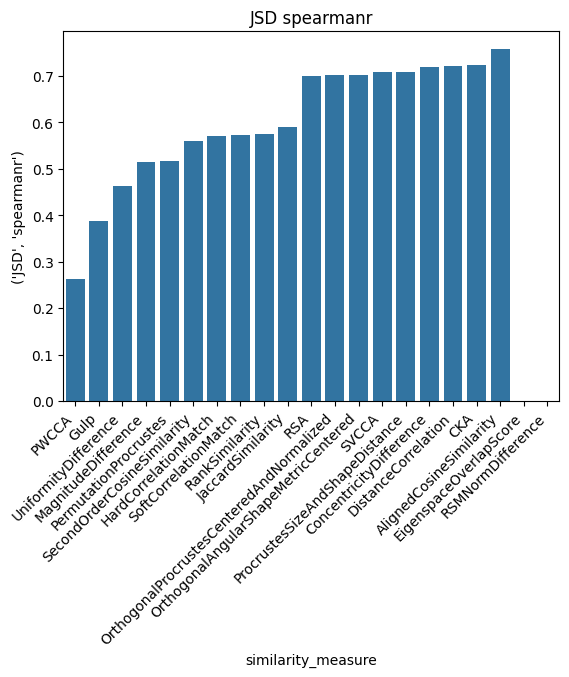

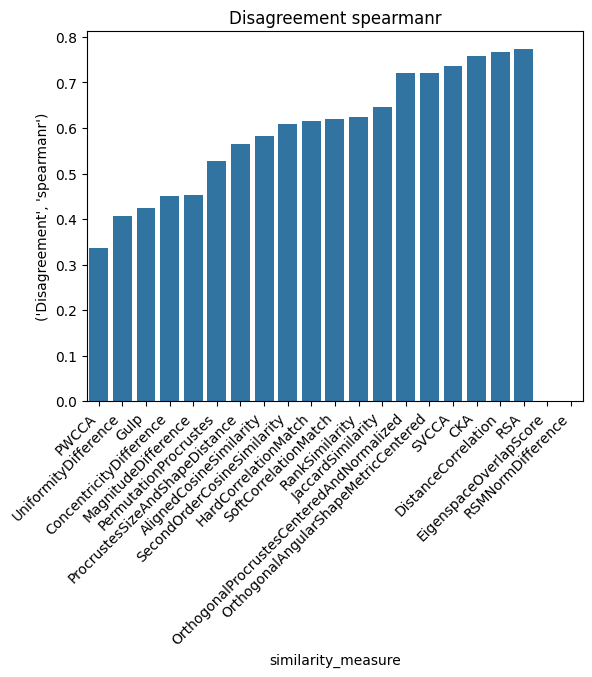

In [13]:
qmeasure = "spearmanr"
for funcsim_measure in ["JSD", "Disagreement"]:
    plot_df = corr_df.loc[:, (funcsim_measure,qmeasure)].reset_index()#.unstack(1).reset_index()
    print(plot_df)
    plt.figure()
    g = sns.barplot(data=plot_df.sort_values(by=(funcsim_measure, qmeasure)), x="similarity_measure", y=(funcsim_measure, qmeasure))
    g.set_title(f"{funcsim_measure} {qmeasure}")

    ax = g.axes
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")